In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize

In [2]:
sns.set_style('darkgrid')

In [3]:
apartments = pd.read_csv('../data/processed/apartments.csv')
print(apartments.shape)
apartments = apartments.loc[(apartments['tipo_operacion'] == 'VENTA') & (apartments['coords_modified'] == False)]
apartments = apartments.drop(['precio_arriendo'], axis=1)
apartments.head()

(63245, 38)


,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,84.0,3.0,3.0,680000.0,1.0,SANTA BARBARA,...,0,0,1,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1135.12,0
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,77.2,3.0,2.0,367000.0,1.0,COLINA Y ALREDEDORES,...,1,1,1,1,False,SUBA,CAMPOS DE SILENCIO,Cardio Infantil,936.00,0
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,213.0,3.0,4.0,994000.0,3.0,COUNTRY,...,0,1,1,1,False,USAQUEN,GINEBRA,Prado Veraniego,2766.29,0
5,2456-M3860535,APARTAMENTO,VENTA,7.500000e+08,142.0,3.0,3.0,400000.0,2.0,COLINA Y ALREDEDORES,...,0,1,1,1,False,SUBA,URB. LA SIRENA,Mazuren,1695.51,0
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.0,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,957.43,0


In [4]:
apartments.shape

(42874, 37)

In [5]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42874 entries, 1 to 62409
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo                               42874 non-null  object 
 1   tipo_propiedad                       42874 non-null  object 
 2   tipo_operacion                       42874 non-null  object 
 3   precio_venta                         42874 non-null  float64
 4   area                                 42873 non-null  float64
 5   habitaciones                         42872 non-null  float64
 6   banos                                42872 non-null  float64
 7   administracion                       38666 non-null  float64
 8   parqueaderos                         42872 non-null  float64
 9   sector                               41003 non-null  object 
 10  estrato                              42858 non-null  float64
 11  antiguedad                       

In [6]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

# Elimindando Outliers

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='precio_venta'>

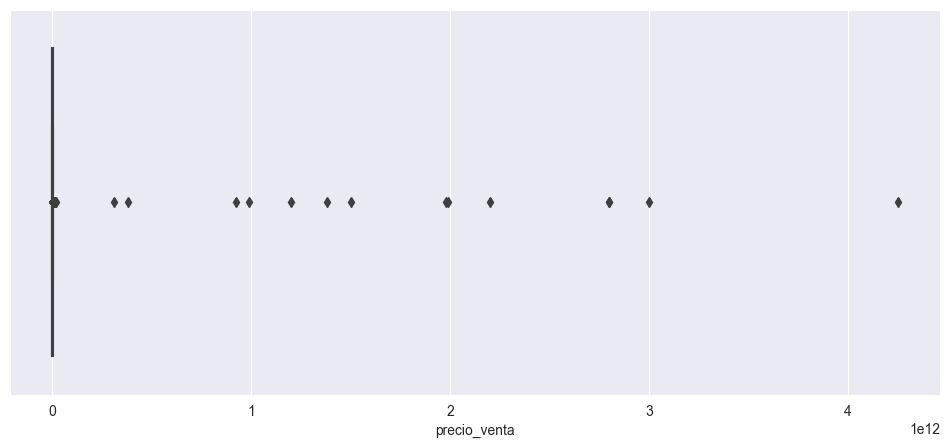

In [7]:
plt.figure(figsize=(12, 5))

sns.boxplot(x='precio_venta', data=apartments)

In [8]:
Q1 = apartments['precio_venta'].quantile(0.25)
Q3 = apartments['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = apartments.loc[(apartments['precio_venta'] < lower) | (apartments['precio_venta'] > upper)]
outliers.shape

(2851, 37)

In [9]:
apartments = apartments[(apartments['precio_venta'] > lower) & (apartments['precio_venta'] < upper)]
apartments.shape

(40021, 37)

# Analisis Univariado

## Precio de Venta

In [10]:
apartments['precio_venta'].describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,"40,021.0","728,580,861.3233552","505,856,679.5479346","245,000.0","355,000,000.0","560,000,000.0","969,000,000.0","2,311,000,000.0"


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


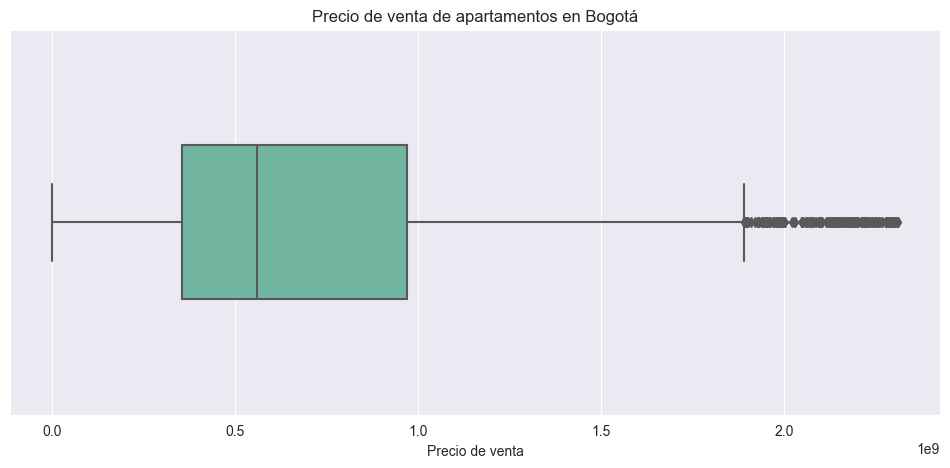

In [11]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    apartments,
    x='precio_venta',
    width=.4,
    palette='Set2'
)

plt.title('Precio de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


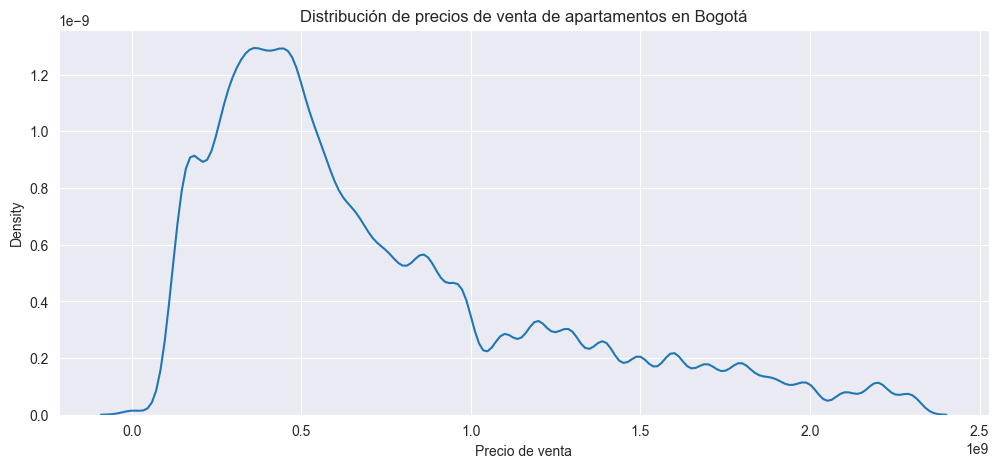

In [12]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    apartments,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

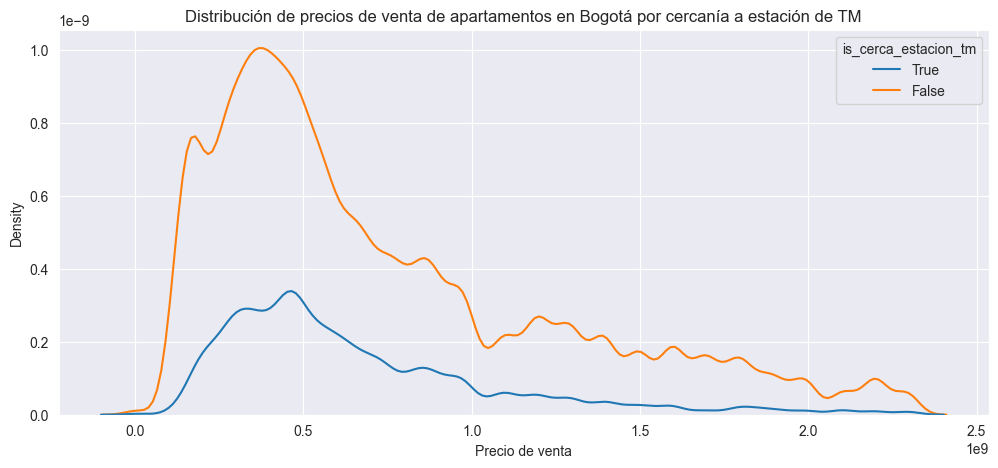

In [15]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    apartments,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    bw_adjust=.5,
    hue_order=[True, False],
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

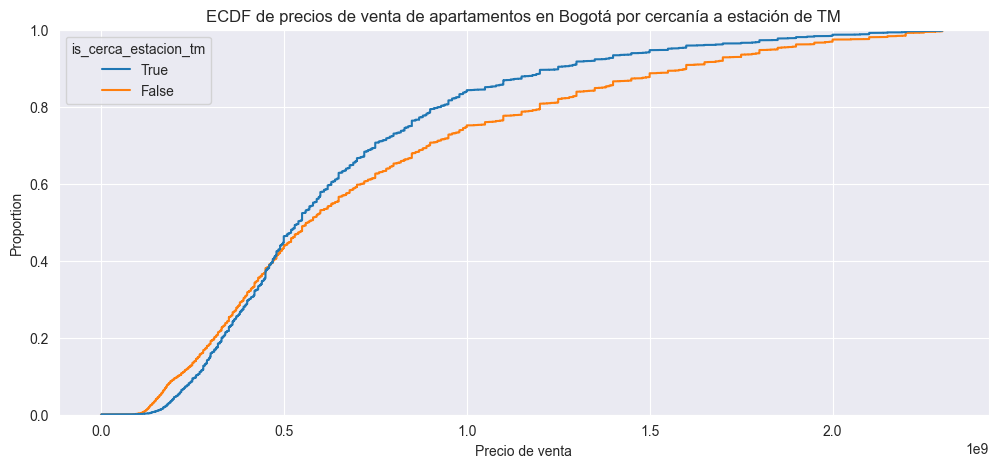

In [16]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    apartments,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
)

plt.title('ECDF de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()